# <ins> Modeling Notebook <ins/>
> By: Matteo Cangiano, Daniel Sheehan, and Q Leedham  

## Table of Contents
 1. [Importing Libraries & Data](#Importing-Libraries-&-Data)
 2. [Modeling](#Modeling)
  - [Base Model](#Base-Model)
  - [Logistic Regression Model](#Logistic-Regression-Model)
  - [KNN Model](#KNN-Model)
  - [Decision Tree Model](#Decision-Tree-Model)
  - [Bagging Classifier Model](#Bagging-Classifier-Model)
  - [Random Forest Model](#Random-Forest-Model)
  - [Extra Trees Model](#Extra-Trees-Model)
  - [AdaBoost Model](#AdaBoost-Model)
  - [Gradient Boost Model](#Gradient-Boost-Model)
  - [Voting Classifier Model](#Voting-Classifier-Model)  
    
    
 3. [Model Selection](#Model-Selection)
 4. [Model Evaluation](#Model-Evaluation)
 5. [Conclusion](#Conclusion)  
   - [Recommendations and Limitations](#Recommendations-and-Limitations)  
     
     
 7. [References](#References)

## Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz



import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('final_dataset.csv')

In [3]:
data.head()

,cd_geocodi,nm_subdist,nm_distrit,nm_municip,nm_micro,nm_meso,id1,geog_orig_area,favela_present,favela_area_squaremeters,...,brazil_store_near_price,brazil_ph_count_listings,brazil_ph_near_fid,brazil_ph_near_dist,brazil_ph_near_angle,brazil_ph_near_price,population_estimate,total_listing_count,listing/pop,listing/area
0,350570810000023,,ALDEIA,BARUERI,OSASCO,METROPOLITANA DE STO PAULO,4151,2.257383e+05,0.0,0.0,...,1200.0,0.0,31,8889.189773,-158.493799,2500.0,1164.570831,0.0,0.000000,0.000000
1,350570810000025,,ALDEIA,BARUERI,OSASCO,METROPOLITANA DE STO PAULO,4153,3.926667e+04,0.0,0.0,...,1200.0,0.0,31,8546.979457,-156.899284,2500.0,413.065460,0.0,0.000000,0.000000
2,350570805000043,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4380,3.925101e+04,0.0,0.0,...,550.0,0.0,31,17668.657905,-146.372789,2500.0,424.170563,0.0,0.000000,0.000000
3,350570805000056,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4393,7.136625e+04,0.0,0.0,...,7560.0,0.0,31,14395.394220,-159.666627,2500.0,272.054306,3.0,0.011027,0.000042
4,350570805000057,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4394,1.264789e+06,0.0,0.0,...,7560.0,0.0,31,13056.248015,-160.753356,2500.0,2401.068539,6.0,0.002499,0.000005


In [4]:
data.describe()

,cd_geocodi,id1,geog_orig_area,favela_present,favela_area_squaremeters,sao_paulo_apartment_count_listings,sao_paulo_apartment_near_fid,sao_paulo_apartment_near_dist,sao_paulo_apartment_near_angle,sao_paulo_apartment_near_price,...,brazil_store_near_price,brazil_ph_count_listings,brazil_ph_near_fid,brazil_ph_near_dist,brazil_ph_near_angle,brazil_ph_near_price,population_estimate,total_listing_count,listing/pop,listing/area
count,2.781700e+04,27817.000000,2.781700e+04,27817.000000,27817.000000,27817.000000,27817.000000,27817.000000,27817.000000,2.781700e+04,...,27817.000000,27817.000000,27817.000000,27817.000000,27817.000000,27817.000000,27817.000000,27817.000000,27817.000000,27817.000000
mean,3.545147e+14,45631.993637,1.086461e+05,0.221411,852.603057,0.480749,6383.476939,1381.466201,0.966970,1.669580e+05,...,8269.046986,0.003775,64.715102,5580.939094,-1.423161,3395.134270,697.857937,1.361326,0.003534,0.000048
std,1.143566e+12,14182.287715,6.679838e+05,0.415204,3375.446206,2.125265,4288.662831,2225.903861,91.443765,2.991915e+05,...,19840.795138,0.140948,42.603400,4132.284706,102.503573,3615.253919,814.251001,4.751517,0.023553,0.000312
min,3.505708e+14,4151.000000,7.204612e+01,0.000000,0.000000,0.000000,0.000000,0.000000,-179.999999,4.800000e+02,...,243.000000,0.000000,0.000000,0.000000,-179.999978,600.000000,0.022254,0.000000,0.000000,0.000000
25%,3.548708e+14,40223.000000,1.966987e+04,0.000000,0.000000,0.000000,2122.000000,44.663556,-60.623415,1.500000e+03,...,1300.000000,0.000000,31.000000,2309.688526,-94.930909,1200.000000,271.887459,0.000000,0.000000,0.000000
50%,3.550308e+14,49162.000000,3.735301e+04,0.000000,0.000000,0.000000,6597.000000,317.392635,0.000000,8.000000e+04,...,2800.000000,0.000000,69.000000,4725.310805,-4.645367,2200.000000,541.281494,0.000000,0.000000,0.000000
75%,3.550309e+14,55899.000000,6.344960e+04,0.000000,0.000000,0.000000,9867.000000,1580.365671,70.885312,2.350000e+05,...,7500.000000,0.000000,85.000000,8079.799727,100.043084,3500.000000,857.065901,1.000000,0.000729,0.000007
max,3.552809e+14,65450.000000,6.401871e+07,1.000000,142763.606501,72.000000,13639.000000,18814.572237,179.999998,7.500000e+06,...,250000.000000,16.000000,152.000000,22174.147819,179.950102,15000.000000,26176.639700,128.000000,2.529498,0.039202


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27817 entries, 0 to 27816
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   cd_geocodi                          27817 non-null  int64  
 1   nm_subdist                          27817 non-null  object 
 2   nm_distrit                          27817 non-null  object 
 3   nm_municip                          27817 non-null  object 
 4   nm_micro                            27817 non-null  object 
 5   nm_meso                             27817 non-null  object 
 6   id1                                 27817 non-null  int64  
 7   geog_orig_area                      27817 non-null  float64
 8   favela_present                      27817 non-null  float64
 9   favela_area_squaremeters            27817 non-null  float64
 10  sao_paulo_apartment_count_listings  27817 non-null  float64
 11  sao_paulo_apartment_near_fid        27817

In [6]:
X_cols = [
    'sao_paulo_apartment_count_listings', 'sao_paulo_apartment_near_dist',
    'sao_paulo_apartment_near_angle', 'sao_paulo_apartment_near_price',
    'brazil_apartment_count_listings', 'brazil_apartment_near_dist',
    'brazil_apartment_near_angle', 'brazil_apartment_near_price',
    'brazil_house_count_listings', 'brazil_house_near_dist',
    'brazil_house_near_angle', 'brazil_house_near_price',
    'brazil_store_count_listings', 'brazil_store_near_dist',
    'brazil_store_near_angle', 'brazil_store_near_price',
    'brazil_ph_count_listings', 'brazil_ph_near_dist', 'brazil_ph_near_angle',
    'brazil_ph_near_price', 'population_estimate', 'total_listing_count',
    'listing/pop', 'listing/area'
]

X = data[X_cols]
y = data['favela_present']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=19)

Picking out the numeric columns that might help with determining the presence of an informal settlements from the real estate and population data we were able to find.

## Modeling

### Base Model

In [7]:
data['favela_present'].value_counts(normalize = True)

0.0    0.778589
1.0    0.221411
Name: favela_present, dtype: float64

A baseline model that predicts no favelas present in each census grid would be about 77.8% accurate. Any models we make should perform better than that.

### Logistic Regression Model

Starting off with a scaler and logistic regression model.

In [8]:
pipe = Pipeline(steps=[('sc', StandardScaler()), ('lr', LogisticRegression())])

params = {
    'lr__penalty': ['l1', 'l2'],
    'lr__C': [0.1, 0.3, 0.5, 0.7, 1.0],
}

gs_lr = GridSearchCV(pipe, param_grid=params, cv=5, scoring='accuracy')

gs_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
  

In [9]:
# Best Estimator for GridSearch
gs_lr.best_estimator_

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [10]:
# Training Score
gs_lr.score(X_train, y_train)

0.7846323458920526

In [11]:
# Test Score
gs_lr.score(X_test, y_test)

0.7859094176851186

In [12]:
# Cross-Val Score
gs_lr.best_score_

0.7838174671651807

This model performs about as well as the base model, but could definitely perform a lot better. Moving on to a K-Nearest Neighbors model to see how well it performs.

### KNN Model

In [13]:
pipe = Pipeline(steps=[('sc', StandardScaler()), ('knn',
                                                  KNeighborsClassifier())])

params = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__metric': ['minkowski', 'euclidean', 'manhattan']
}

gs_knn = GridSearchCV(pipe, param_grid=params, cv=5, scoring='accuracy')

gs_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),

In [14]:
# Best Estimator for GridSearch
gs_knn.best_estimator_

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='manhattan', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)

In [15]:
# Training Score
gs_knn.score(X_train, y_train)

0.9299683635317803

In [16]:
# Test Score
gs_knn.score(X_test, y_test)

0.8563623292595255

In [17]:
# Cross-Val Score
gs_knn.best_score_

0.8526986866072285

This model is already better than the base model. There is still some room for improvement, however. Next step is to try a Decision Tree model.

### Decision Tree Model

In [18]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
# Training Score
tree.score(X_train, y_train)

1.0

In [20]:
# Test Score
tree.score(X_test, y_test)

0.8475916606757729

In [21]:
# Cross-Val Score
cross_val_score(tree, X_train, y_train, cv = 5).mean()

0.8393726100756449

The Desicion Tree doesn't perform as well as K-Nearest Neighbors at the moment. Let's move onto Random Forests, to see how that works.

### Bagging Classifier Model

In [22]:
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [23]:
# Training Score
bagging.score(X_train, y_train)

0.9915636084747388

In [24]:
# Test Score
bagging.score(X_test, y_test)

0.8816678648454349

In [25]:
# Cross-Val Score
cross_val_score(bagging, X_train, y_train, cv = 5).mean()

0.8764264560437416

The Bagging Classifier looks like the best model so far.  It could definitely still be better, though. Let's move on to a Random Forest Model next.

### Random Forest Model

In [26]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
# Training Score
rand_forest.score(X_train, y_train)

0.9903173233630524

In [28]:
# Test Score
rand_forest.score(X_test, y_test)

0.8861250898634077

In [29]:
# Cross-Val Score
cross_val_score(rand_forest, X_train, y_train, cv = 5).mean()

0.8755633307221287

This model works almost as well as the Bagging model, but there is still room for improvement. Let's increase the randomness of the model and try to reduce the variance with an Extra Trees model.

### Extra Trees Model

In [30]:
pipe = Pipeline(steps=[('extra_trees', ExtraTreesClassifier())])

params = {'extra_trees__n_estimators': [300, 400, 500, 600]}
gs_extra_trees = GridSearchCV(pipe,
                              param_grid=params,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-2)
gs_extra_trees.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('extra_trees',
                                        ExtraTreesClassifier(bootstrap=False,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                                 

In [31]:
# Best Estimator for GridSearch
gs_extra_trees.best_estimator_

Pipeline(memory=None,
         steps=[('extra_trees',
                 ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                      criterion='gini', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=500, n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False))],
         verbose=False)

In [32]:
# Training Score
gs_extra_trees.score(X_train, y_train)

1.0

In [33]:
# Test Score
gs_extra_trees.score(X_test, y_test)

0.8961897915168944

In [34]:
# Cross-Val Score
cross_val_score(gs_extra_trees.best_estimator_, X_train, y_train, cv = 5).mean()

0.8862524985948612

That's an even better model, but we can still improve a lot. Let's try another boosting model like AdaBoost to see how well it performs.

### AdaBoost Model

In [35]:
ada = AdaBoostClassifier(n_estimators = 200)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [36]:
# Training Score
ada.score(X_train, y_train)

0.831511839708561

In [37]:
# Testing Score
ada.score(X_test, y_test)

0.8225736879942488

In [38]:
# Cross-Val Score
cross_val_score(ada, X_train, y_train, cv = 5).mean()

0.821253745733576

This model is worse than most of the previous models, the Extra Trees model is still the best option for the moment. Let's try moving on to a Voting Classifier to see how well it performs.

### Gradient Boost Model

In [39]:
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [40]:
# Training Score
grad_boost.score(X_train, y_train)

0.8467069312625827

In [41]:
# Test Score
grad_boost.score(X_test, y_test)

0.8363767074047448

In [42]:
# Cross-Val Score
cross_val_score(grad_boost, X_train, y_train, cv = 5).mean()

0.8334768236902697

This model is slightly better than the AdaBoost model, but still not as good as the Extra Trees model. Let's try a Voting Classifier with the best performing models next.

### Voting Classifier Model

In [43]:
knn_pipe = Pipeline([('ss', StandardScaler()),
                     ('knn', KNeighborsClassifier())])

vote = VotingClassifier([
    ('x_tree', ExtraTreesClassifier()),
    ('rand_forest', RandomForestClassifier()),
    ('knn_pipe', knn_pipe),
],
                        voting='soft')
vote_params = {
    'x_tree__max_depth': [None, 4],
    'rand_forest__max_depth': [3, 4],
    'knn_pipe__knn__n_neighbors': [3, 5, 7],
}
gs_vc = GridSearchCV(vote,
                     param_grid=vote_params,
                     cv=5,
                     n_jobs=-2,
                     scoring='accuracy')
gs_vc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=VotingClassifier(estimators=[('x_tree',
                                                     ExtraTreesClassifier(bootstrap=False,
                                                                          class_weight=None,
                                                                          criterion='gini',
                                                                          max_depth=None,
                                                                          max_features='auto',
                                                                          max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,
                                                                          min_impurity_split=None,
                                                                          min_samples_leaf=1,
                                   

In [44]:
gs_vc.best_params_

{'knn_pipe__knn__n_neighbors': 3,
 'rand_forest__max_depth': 4,
 'x_tree__max_depth': None}

In [45]:
# Training Score
gs_vc.score(X_train, y_train)

0.9940082446553542

In [46]:
# Test Score
gs_vc.score(X_test, y_test)

0.883393242271747

In [47]:
#Cross-Val Score
gs_vc.best_score_

0.8758028952161825

This model works well, but it's not as strong as the Extra Trees model.

## Model Selection

The Extra Trees model labeled gs_extra_trees is the clear best model for this project. It has the best accuracy score, but we have test our model performance using a Confusion Matrix and ROC Curve.

## Model Evaluation

In [48]:
# getting predictions and saving them to a csv for mapping
preds = gs_extra_trees.predict(X)
data['predicted_favela_present'] = preds
map_df = data[['cd_geocodi', 'favela_present', 'predicted_favela_present']]
map_df.to_csv('predicted-favelas.csv', index=False, header=False)

### Confusion Matrix

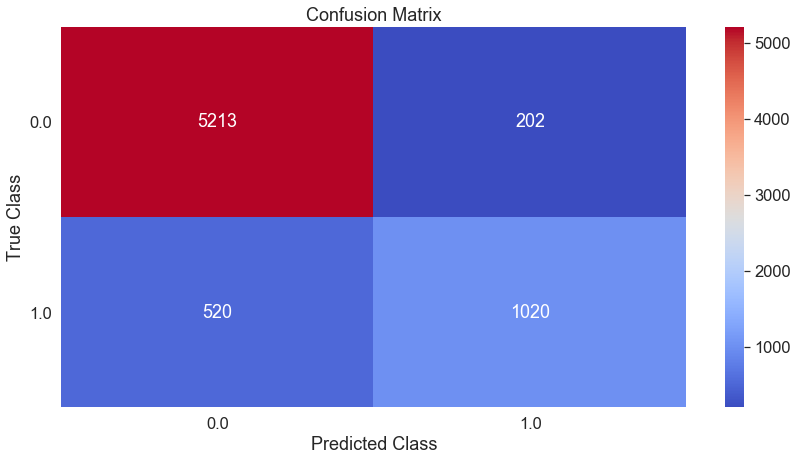

In [49]:
y_pred = gs_extra_trees.predict(X_test) #getting predictions from the extra trees model

def pretty_confusion_matrix(y_true, y_pred):
    '''
    Creates a confusion matrix and puts it into a prettier looking image.
    '''
    # handling data
    cm = confusion_matrix(y_true, y_pred)
    labels = y_true.unique()
    labels.sort()
    
    
    # plotting
    sns.set(font_scale=1.5)
    plt.figure(figsize=(14,7))
    
    chart = sns.heatmap(cm, annot=True, fmt='g', cmap="coolwarm", xticklabels = labels, yticklabels = labels)
    chart.set_yticklabels(chart.get_yticklabels(), rotation=0)
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')

pretty_confusion_matrix(y_test, y_pred)

In [50]:
TNR = 5216 / (5216 + 519)
TPR = 1021 / (1021 + 199)
print(f'The True Negative Rate is {TPR}')
print(f'The True Positive Rate is {TNR}')

The True Negative Rate is 0.8368852459016394
The True Positive Rate is 0.9095030514385353


Our model correctly predicts the presense of an informal settlement, or favela, 83.6% of the time. It correctly predicts the presence of settlements in 1021 census tracts, while incorrectly predicting the presense of a settlement in 199 tracts.

The model performs slightly better when predicting the absence of an informal settlement, with a True Negative Rate of 90.9%. The model correctly predicts the lack of a settlement in 5216 tracts and incorrectly predicts the presense of a settlement where there likely is none in 519 tracts.

### ROC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.946


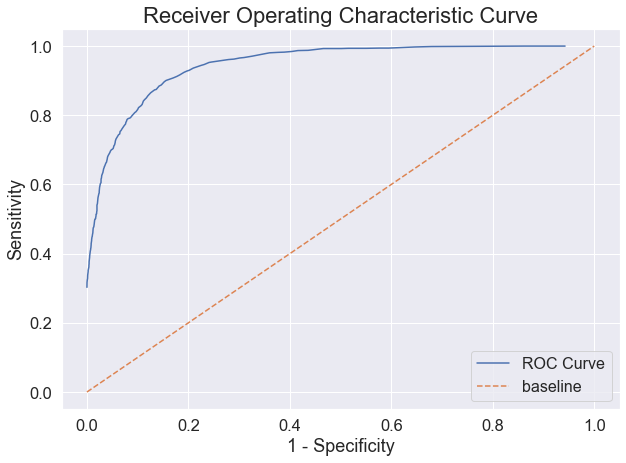

In [51]:
# Creating a DataFrame to facilitate plotting.
pred_proba = [i[1] for i in gs_extra_trees.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test, 'pred_probs': pred_proba})

# Creating ROC Scores for baseline and best model.
ns_probs = [0 for _ in range(len(y_test))]
pipe_probs = gs_extra_trees.predict_proba(X_test)
pipe_probs = pipe_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
pipe_auc = roc_auc_score(y_test, pipe_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (pipe_auc))
# Create figure.
plt.figure(figsize=(10, 7))
# Create threshold values.
thresholds = np.linspace(0, 1, 200)


# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1)
                       & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1)
                        & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)


# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0)
                       & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0)
                        & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))


# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [
    TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds
]
fpr_values = [
    FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds
]
# Plot ROC curve.
plt.plot(
    fpr_values,  # False Positive Rate on X-axis
    tpr_values,  # True Positive Rate on Y-axis
    label='ROC Curve')
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')
# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=16);

The ROC AUC of the model is 94.6%, meaning there is a 94.6% chance that it will correctly predict the presense or absence of an informal settlement. With more time to find the values that the model predicts incorrectly there's a chance that score could be higher, but it is still quite high as it is.

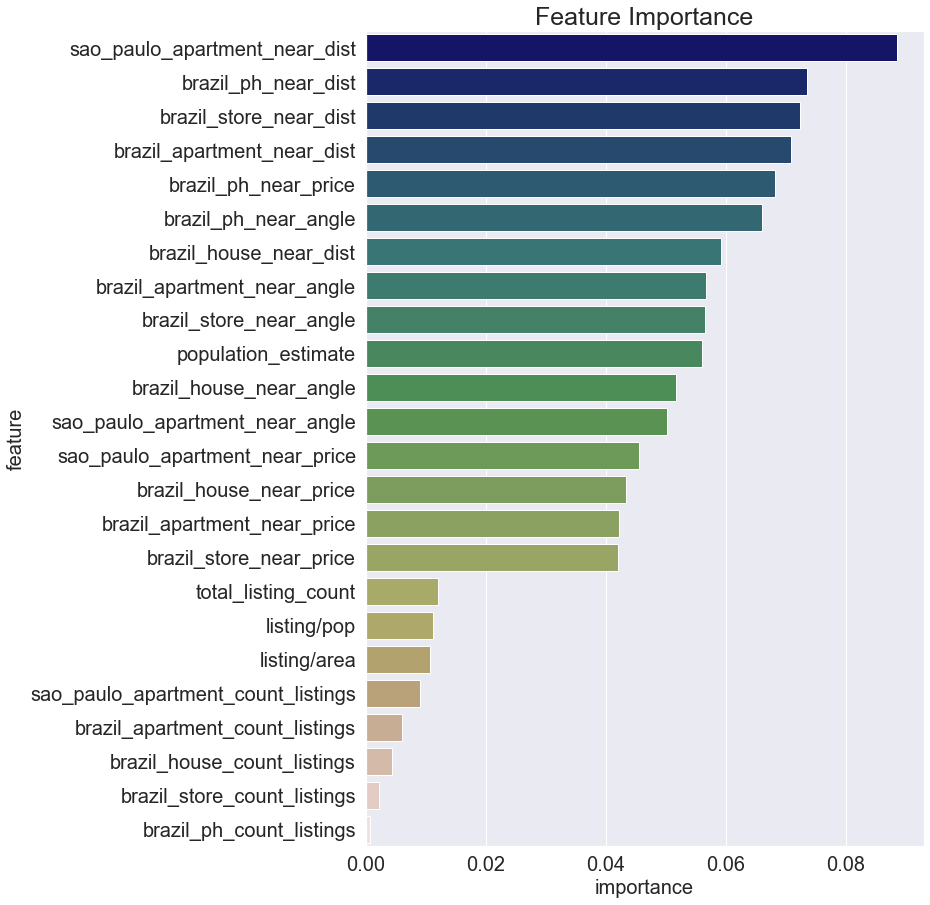

In [52]:
# getting the feature importances crom the model
feats = gs_extra_trees.best_estimator_.steps[0][1].feature_importances_
# getting keys of the test set
keys = X_test.keys()
# zipping the keys and feature importances
feat_import = pd.DataFrame(list(zip(keys, feats)),
                           columns=['feature', 'importance'])
# sorting the dataframe by importance
feat_import = feat_import.sort_values(by='importance', ascending=False)

# plotting importance
plt.figure(figsize=(10, 15))
plt.title('Feature Importance', fontsize=25)
sns.set_style("darkgrid")
sns.barplot(data=feat_import,
            x='importance',
            y='feature',
            orient='h',
            palette="gist_earth")
plt.xlabel('importance', fontsize=20)
plt.ylabel('feature', fontsize=20)
plt.tick_params(labelsize=20)

The most important features in the Extra Tree model are those that deal with the distance to the closest real estate listing. The biggest indicator is the distance to the closest listing from the São Paulo dataset we used. That data set included apartments that were only located in the city, as opposed to the other dataset which contained national Brazil real estate listings. The second and third most important features were the distance to the closest private home and store real estate listings.

The number of apartment, store, house, and private home listings in a census tract were not important features in the model. This lines up with the idea that informal settlements can pop up anywhere in an urban environment, regardless of how close they are to other buildings or services. Some favelas, like Paraisópolis, even have stores and services such as hospitals inside of them. Paraisópolis is an anolomy, however, as not all informal settlements have power and city services like it has.

According to [GSRDC](https://gsdrc.org/topic-guides/urban-governance/key-policy-challenges/informal-settlements/), most informal settlements usually lack basic services and city infrastructure.

Unfortunately, due do the model used, we cannot know how exactly these features impact the results. Even just one tree from the model is too large to reasonably graph, and no other model we used performs as well. None of the other higher-performing models are better for evaulation than this, there's limitations to all of them.

## Conclusion

Using real estate listings and population mapped to census tracts we were able to find a few models that predicted the presense or absence of informal settlements in São Paulo with relatively high accuracy. We found that the distance from real estate listings were the biggest indicators of where a favela is present in the city. The price and number of those listings matter much less, however.

This method could potentially be expanded to other cities, but would rely on finding the required data. Different cities would likely require different data, however. In Alexandria, Egypt, for example, informal settlements are more likely to [encroach on agricultural land](https://www.sciencedirect.com/science/article/pii/S111001681730279X). All we can say for sure is that the models we used work in São Paulo, and potentially other cities in the region.

### Recommendations and Limitations

As noted in the conclusion, we recommend using different models for different regions. While this model works well for the city we tested in on, it may not work well in less urban environments where informal settlements may be constructed.

This method isn't perfect, and will likely work best when used in conjunction with other methods of detecting informal settlements using satellite data. A combination of the two would likely yield better results than these models alone.

One limitation is that very small favelas will mark an entire census tract as having an informal settlement within it. Future iterations may want to limit the number of small informal settlements included in the model.

Future versions may also want to avoid using census tracts as a geographical unit as they tend to have unusual shapes. Other methods should be considered for geographical mapping.

## References

- https://gsdrc.org/topic-guides/urban-governance/key-policy-challenges/informal-settlements
- https://www.sciencedirect.com/science/article/pii/S111001681730279X